In [223]:
import os
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:

rdir="results/tres_pert"

datasets = [d for d in os.listdir(f"../{rdir}") if not d.startswith(".")]

results = []
curves = []
for part in ("train", "test"):
    for dset in datasets:
        dirs =  [d for d in os.listdir(f"../{rdir}/{dset}") if not d.startswith(".")]

        for dir in dirs:
            runs = [d for d in os.listdir(f"../{rdir}/{dset}/{dir}") if not d.startswith(".")] 
            for seed in runs:
                try:
                    exp_dir = f"../{rdir}/{dset}/{dir}/{seed}"
                    with open(f"{exp_dir}/metrics_{part}.yaml", 'r') as io:
                        metrics = yaml.safe_load(io)

                    with open(f"{exp_dir}/config.yaml", 'r') as io:
                        cfg = yaml.safe_load(io)
                    metrics['seed'] = int(seed)
                    metrics['dataset'] = dset
                    metrics['dir'] = dir
                    metrics["part"] = part
                    results.append(metrics)

                    curve = pd.read_csv(f"{exp_dir}/curve.csv")
                    curve['seed'] = int(seed)
                    curve['dir'] = dir
                    curve['dataset'] = dset
                    curve["part"] = part
                    curves.append(curve)
                except:
                    pass

results = pd.DataFrame(results)
curves = pd.concat(curves)

pd.set_option('display.max_colwidth', -1)
results.groupby(['part', 'dataset', 'dir']).mean().reset_index()

/tmp/ipykernel_123103/1033435645.py:39: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,part,dataset,dir,aipw_curve_error,best_iter,best_val,density_negll,last_saved_epoch,outcome_loss,plugin_curve_error,ratio_reg_loss,total_loss,tr_curve_error,tr_loss,seed
0,test,ihdp-N,--dataset ihdp-N,0.195544,9921.0,0.084946,3.420675,9999.0,0.305747,0.204445,0.339138,0.647629,0.200302,0.839793,12.0
1,test,ihdp-N,--dataset ihdp-N --tr_reg --pert simple,0.195544,9921.0,0.084946,3.420675,9999.0,0.305747,0.204445,0.339138,0.647629,0.200302,0.839793,12.0
2,test,ihdp-N,--dataset ihdp-N --tr_reg --pert simple --detach_ratio,0.189803,6319.0,0.134723,3.425758,6341.0,0.408720,0.203480,0.340387,0.752623,0.200459,1.130617,12.0
3,train,ihdp-N,--dataset ihdp-N,0.134965,9921.0,0.084946,3.420675,9999.0,0.305747,0.148635,0.339138,0.647629,0.141310,0.839793,12.0
4,train,ihdp-N,--dataset ihdp-N --tr_reg --pert simple,0.134965,9921.0,0.084946,3.420675,9999.0,0.305747,0.148635,0.339138,0.647629,0.141310,0.839793,12.0
5,train,ihdp-N,--dataset ihdp-N --tr_reg --pert simple --detach_ratio,0.133448,6299.0,0.135289,3.425828,6317.0,0.419915,0.148469,0.340303,0.763749,0.141544,1.150780,12.0


In [225]:
# results.groupby(['dataset', 'dir']).std().reset_index()

Plot curves

In [226]:
# curves_means = curves.groupby(['dataset', 'var', 'ratio', 'delta']).mean().reset_index().set_index(['dataset', 'var', 'ratio'])
# curves_stdevs = curves.groupby(['dataset', 'var', 'ratio', 'delta']).std().reset_index().set_index(['dataset', 'var', 'ratio'])
# # D_var0_ratio0 = curves[curves.combo == 0]
# curves_means

In [227]:
curves.dataset.unique()
# curves

array(['ihdp-N'], dtype=object)

========== ihdp-N-train =========
(750, 19)


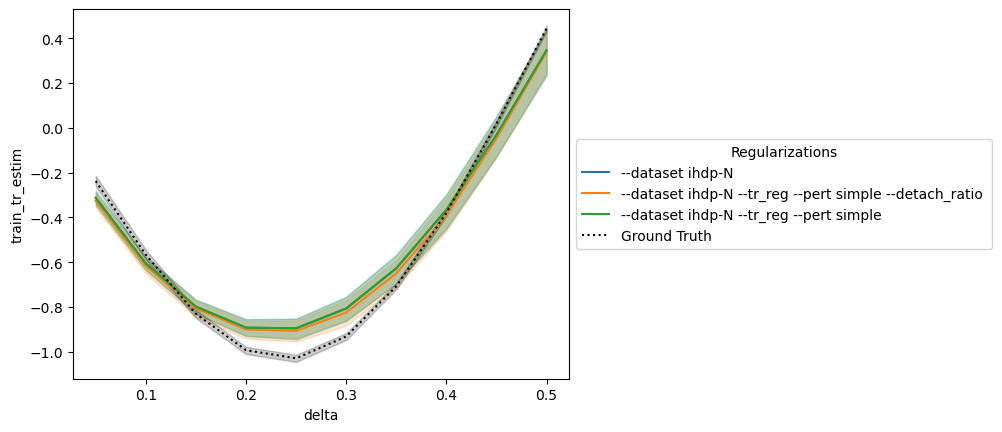

========== ihdp-N-test =========
(750, 19)


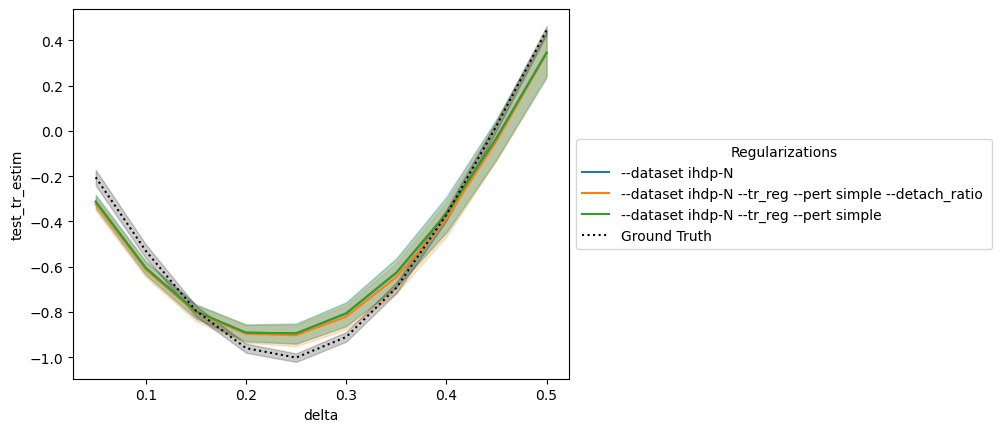

In [228]:

for part in ("train", "test"):
    for dset in datasets:
        print(f"========== {dset}-{part} =========")
        D = curves[(curves.dataset == dset) & (curves.part == part)].drop_duplicates(["delta", "dir", "seed"])
        D = D.fillna(0)
        truth = D[D.dir == D.dir.iloc[0]][["delta", f"{part}_truth"]]
        print(D.shape)
        sns.lineplot(x="delta", y=f"{part}_tr_estim", hue="dir", data=D, legend=True)
        # sns.lineplot(x="delta", y=f"{part}_aipw_estim", hue="dir", data=D, legend=True, ls="--")
        sns.lineplot(x="delta", y=f"{part}_truth", label="Ground Truth", c="black", ls=":", data=D, legend=True)
        plt.legend(title='Regularizations', loc='center left', bbox_to_anchor=(1, 0.5))
    
        plt.show()